In [ ]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.cm as cm

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
x = diabetes.data
y = diabetes.target

In [ ]:
targets = diabetes.target
#print(targets)
n_targets = len(targets)
features = diabetes.feature_names
n_features = len(features)
print(n_targets)

442


# **EJERCICIO 3.1**

**Implemetación del modelo MLPRegressor y su cross validation -> regresión no lineal**

In [ ]:
# Evaluate model
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

# Especificar los parámetros del modelo
hidden_layer_sizes = (10, 10, 1)
activation = 'relu'
solver = 'adam'
alpha = 0.001
max_iter = 100
batch_size=25
verbose=0

# Definir el número de folds para la validación cruzada
n_folds = 5

# Crear el objeto KFold para dividir los datos en folds
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Inicializar una lista para almacenar los resultados de la métrica
mse_scores = []
r2 = 0
# Iterar sobre los folds
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Crear y ajustar el modelo de regresión
    regressor = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, max_iter=max_iter, random_state=42, batch_size=batch_size, verbose=verbose)
    regressor.fit(x_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = regressor.predict(x_test)

    # Calcular la métrica (por ejemplo, el error cuadrático medio)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    r2_i = r2_score(y_test, y_pred)
    r2 += r2_i

# Calcular el promedio de la métrica en los folds
average_mse = sum(mse_scores) / len(mse_scores)
print("-----------------------------------------")
print('Average Mean Squared Error:', average_mse)
print("-----------------------------------------")
r2 = r2/n_folds
print('R^2 = ', r2)
print("-----------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------------
Average Mean Squared Error: 3769.95464824244
-----------------------------------------
R^2 =  0.3516513424503239
-----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


**Stochastic Gradient Batch Implementation**

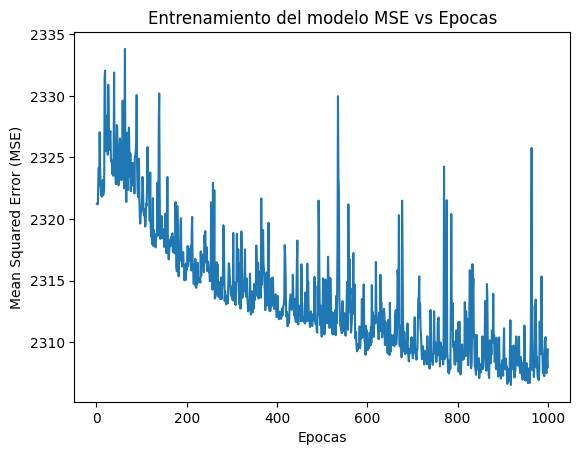

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(x)

# Parámetros del algoritmo de descenso de gradiente estocástico por lotes
batch_size = 130  # Tamaño del lote
learning_rate = 0.001  # Tasa de aprendizaje
max_epochs = 1000  # Número máximo de épocas

# Entrenar el modelo con descenso de gradiente estocástico por lotes
num_samples = X.shape[0]
num_batches = num_samples // batch_size
if num_samples % batch_size != 0:
    num_batches += 1

mse_values = []  # Almacenar los valores del MSE por época

for epoch in range(max_epochs):
    # Mezclar los datos de entrada y los valores de salida de forma aleatoria
    indices = np.random.permutation(num_samples)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    # Iterar sobre los lotes de datos
    for batch in range(num_batches):
        start = batch * batch_size
        end = min((batch + 1) * batch_size, num_samples)
        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        # Realizar una sola iteración de entrenamiento con el lote actual
        regressor.partial_fit(X_batch, y_batch)

    # Calcular el MSE en cada época
    y_pred = regressor.predict(X)
    mse = np.mean((y - y_pred) ** 2)
    mse_values.append(mse)

# Graficar las épocas vs. MSE
plt.plot(range(1, max_epochs + 1), mse_values)
plt.xlabel('Epocas')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Entrenamiento del modelo MSE vs Epocas')
plt.show()